# Crash Course on Machine Learning
# Introduction to Unsupervised Learning: A Customer Segmentation Problem

Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed. There are two main types of machine learning models: supervised and unsupervised.


### Supervised vs Unsupervised

|  | Supervised | Unsupervised |
| --- | --- | --- |
| Target | Labeled Data| Unlabeled Data|
| Training Data | Requires train-test split| Can train entire data |
| Results | Have metrics (e.g. accuracy)|Requires strong domain knowledge to interpret |
| Common Uses | classification, regression| clustering |

For this notebook, we will only be doing unsupervised learning.

## The Data Science Process

1. Businness Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Model Evaluation
6. Deployment

*Note: An actual ML process is not straightforward and requires a lot of iteration.*

## A. Business Understanding

Customer segmentation is the process of **dividing customers into groups based on common characteristics** in order for companies to be able to market to each group effectively and appropriately. One marketing analysis tool used to identify a company's or an organization's best customers is the RFM model. The RFM model is based on three quantitative factors:
- **Recency:** How recently a customer has made a purchase
- **Frequency:** How often a customer makes a purchase
- **Monetary Value:** How much money a customer spends on purchases


Our objective is to be able to **segement the customers based on RFM** so that the company can better target its customers.

## B. Data Understanding

In [7]:
# Let's start coding! Import the usual libraries.
import pandas as pd  
import numpy as np  
import seaborn as sns 
from matplotlib import pyplot as plt  
%matplotlib inline 

<table><td>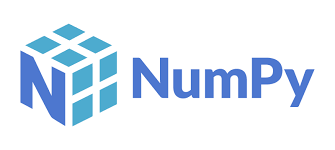</td><td>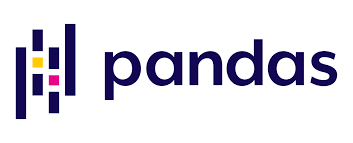</td><tr><td>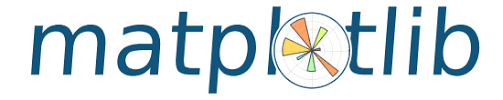</td><td>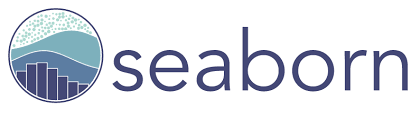</table>

|Library|Description|
|:-:|:--|
|**Pandas**| fast, powerful, flexible and easy to use data analysis and manipulation tool|
|**Numpy**| Python library used for working with arrays and matrices|
|**Matplotlib**| comprehensive library for creating static, animated, and interactive visualizations|
|**Seaborn**| Python data visualization library based on matplotlib|

#### Reading the data with pandas

In [8]:
df_retail = pd.read_csv("Retail.csv", parse_dates=["InvoiceDate"])

Check first five rows

In [9]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DaysLastBought
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


Let's clarify terminologies. 

Every row in the data is called an *obervation* or a *sample* and the total number of rows can also be called your observation size or sample size. Your columns are called *features*. Features represents a measurable piece of data that can be used for analysis. It is also referred to as variables or attribtues. In supervised learning, there is one column which we are trying to predict called the *target variable* or the *label*.

How many observations and features do we have for this data?

In [10]:
df_retail.shape

(541909, 9)

What are these features?

|Column Name|Description|
|:-:|:--|
|InvoiceNo|6-digit integral number uniquely assigned to each transaction|
|StockCode|Product (item) code|
|Description|Product (item) name|
|Quantity|Quantities of each product (item) per transaction|
|InvoiceDate|Day and time when each transaction was generated|
|UnitPrice|Product price per unit in sterling|
|CustomerID|5-digit integral number uniquely assigned to each customer|
|Country|Name of the country where each customer resides|
|DaysLastBough|Number of days prior to 09/12/2011|

In [11]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       541909 non-null  object        
 1   StockCode       541909 non-null  object        
 2   Description     540455 non-null  object        
 3   Quantity        541909 non-null  int64         
 4   InvoiceDate     541909 non-null  datetime64[ns]
 5   UnitPrice       541852 non-null  float64       
 6   CustomerID      406829 non-null  float64       
 7   Country         541909 non-null  object        
 8   DaysLastBought  541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


## C. Data Preparation

### 1. Ensuring that the data is clean


The first step in the data science process is to check first the integrity of your data. Is your data reliable? Always remember: garbage in, garbage out. Your machine learning model is only as good as the data you feed to it. Hence, ensuring that your data is clean is an important step.

***1.1. Handling missing data***

Let's check how many missing data we have for this dataset.

In [12]:
# Dealing with missing data
df_retail.isna().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice             57
CustomerID        135080
Country                0
DaysLastBought         0
dtype: int64

When we have missing values, we can opt to drop the data or to impute it. Let's review first how to drop data using dropna().

In [13]:
# Do we drop row?
print(f'Original dataframe: {df_retail.shape}')
print(f'Dropped rows: {df_retail.dropna(axis=0).shape}')

Original dataframe: (541909, 9)
Dropped rows: (406791, 9)


As you can see, dropping rows containg missing values will reduce the observations from 541909 to 406791. In this case, the dropped observations might not be significant. In some instances, however, dropping can signicantly reduce the size of your data and if you don't have a enough observations, your model might not generalize very well. 

**1.2. Imputing data**

The alternative to dropping missing values is to assume what that data can be and impute it. Commonly used values for imputation are the measures of central tendency: mean, median, or mode. Mean is often used when there are no outliers in the data. Median is used when thera are outliers. Mode can be used when dealing with categorical data. An easy way to impute is by using `fillna()`.

In [45]:
df_retail_impute = df_retail.copy()

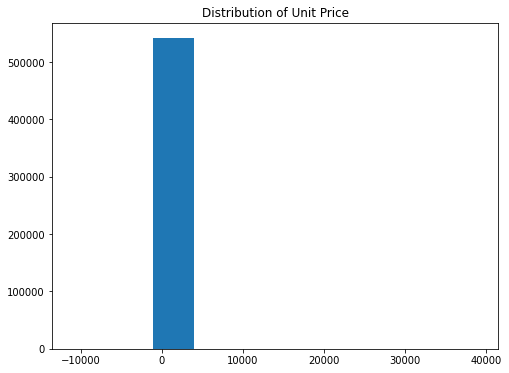

In [46]:
# What should we use to impute?

# Plotting with matplotlib
plt.figure(figsize=(8,6))
plt.hist(df_retail_impute["UnitPrice"]) # Main code for creating the plot
plt.title('Distribution of Unit Price')
plt.show();

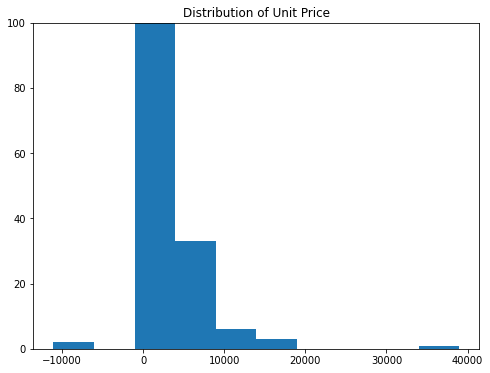

In [16]:
# Zooming in
plt.figure(figsize=(8,6))
plt.hist(df_retail_impute["UnitPrice"]) # Main code for creating the plot
plt.title('Distribution of Unit Price')
plt.ylim(0, 100)
plt.show();

## What should we use to impute?
plt.hist(df_retail_impute["UnitPrice"])
plt.ylim(0,500)
plt.show();

In [17]:
print(f'Mean: {df_retail["UnitPrice"].mean()}')
print(f'Median: {df_retail["UnitPrice"].median()}')

Mean: 4.611352350826424
Median: 2.08


In [18]:
# Fill Nan with median value
df_retail_impute["UnitPrice"] = df_retail_impute["UnitPrice"].fillna(df_retail_impute["UnitPrice"].median())
df_retail_impute.isna().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
DaysLastBought         0
dtype: int64

How do we know if we should drop or impute? One way to do so is to check the difference across the difference summary statistics between the two methods.

In [19]:
# Summary statistics if missing values were dropped
df_retail.dropna().describe() 

,Quantity,UnitPrice,CustomerID,DaysLastBought
count,406791.000000,406791.000000,406791.000000,406791.000000
mean,12.058875,3.460618,15287.667741,151.308591
std,248.703059,69.318396,1713.604052,112.860951
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13953.000000,49.000000
50%,5.000000,1.950000,15152.000000,131.000000
75%,12.000000,3.750000,16791.000000,246.000000
max,80995.000000,38970.000000,18287.000000,373.000000


In [20]:
# Summary statistics if missing values were imputed
df_retail_impute.dropna(inplace=True)
df_retail_impute.describe()

,Quantity,UnitPrice,CustomerID,DaysLastBought
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460489,15287.690570,151.316074
std,248.693370,69.315160,1713.600303,112.869646
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13953.000000,49.000000
50%,5.000000,1.950000,15152.000000,131.000000
75%,12.000000,3.750000,16791.000000,246.000000
max,80995.000000,38970.000000,18287.000000,373.000000


In this case, the difference between dropping and imputing can be seen but is very minimal. 

***1.3 Correcting data types***

We observed the `CustomerID` is currently read as a float with one decimal place. However, recall that our goal is to be able to segment customers. Hence, the CustomerID must be read as a discrete and not a continuous variable. We can convert this to string to achieve this.

In [21]:
df_retail_impute['CustomerID'] = df_retail_impute['CustomerID'].astype(str)
df_retail_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       406829 non-null  object        
 1   StockCode       406829 non-null  object        
 2   Description     406829 non-null  object        
 3   Quantity        406829 non-null  int64         
 4   InvoiceDate     406829 non-null  datetime64[ns]
 5   UnitPrice       406829 non-null  float64       
 6   CustomerID      406829 non-null  object        
 7   Country         406829 non-null  object        
 8   DaysLastBought  406829 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 31.0+ MB


In [22]:
df_retail_impute.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DaysLastBought
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [23]:
df_retail_impute['CustomerID'] = df_retail_impute['CustomerID'].replace('\.0', '', regex=True)
df_retail_impute.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DaysLastBought
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373


In [24]:
retail_final = df_retail_impute.copy()

### 2. Feature Engineering

As mentioned earlier, variables are called features in machine learning. Feature engineering is a term when we extract information from one variable to make new features. A common example is in handling dates. We can do feature engineering with dates to extract the years, months, days, etc. Here we will use feature engineering to obtain the RFM data.

***2.1. Monetary value***
- How much money a customer spends on purchases


In [25]:
# Syntax to create new column
retail_final['Amount'] = retail_final['Quantity']*df_retail['UnitPrice']

# Groupby aggregates value according to a defined category
rfm_m = retail_final.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


***2.2. Frequency***
- How often a customer makes a purchase

In [26]:
rfm_f = retail_final.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


***2.3. Recency***
- How recently a customer has made a purchase

In [27]:
rfm_r = retail_final.groupby('CustomerID')['DaysLastBought'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,DaysLastBought
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


#### Creating the rfm dataframe

In [28]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm = pd.merge(rfm, rfm_r, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


In [29]:
rfm.shape

(4372, 4)

### 3. Handling Outliers
- How do we identify outliers? The easiest way is to try to visualize the data using a boxplot. Let's drop batch and target since these are not continuous variables.

<AxesSubplot:>

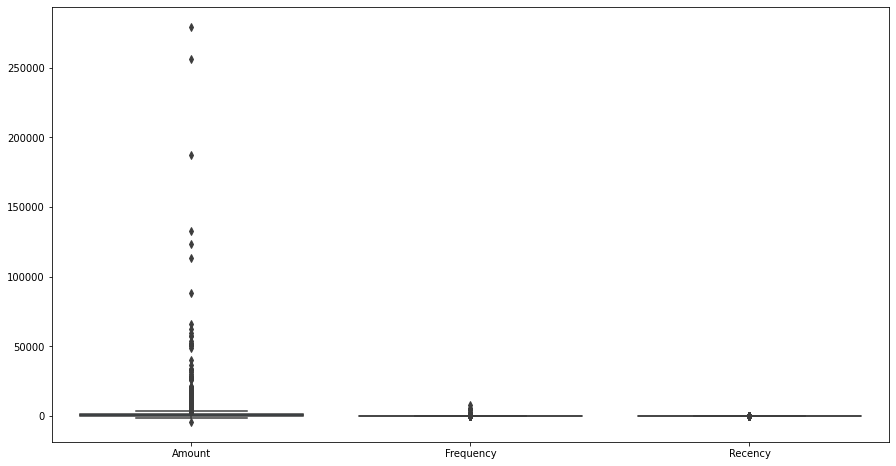

In [30]:
# One way to check is with the use of a boxplot. 
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(data=rfm.drop(["CustomerID"], axis=1))

Outliers, statistically are defined as those outside the interquartile range. As expected, features that are about money usually have outliers. 

In [31]:
# Insert code here
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]


### 4. Scaling

Most of the time, such as in our data, features contain different magnitudes, units and ranges. For most models, distance plays a factor when running the algorithm. Without scaling, features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.


The StandardScaler from Scikit-learn standardizes the dataset by reducing everything to the number of standard deviations that the value is from the mean.

In [32]:
# Rescaling the attributes
from sklearn.preprocessing import StandardScaler
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

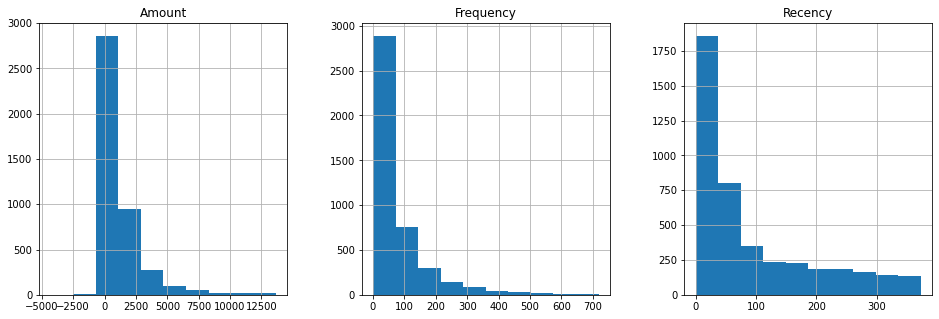

In [33]:
fig, axes = plt.subplots(ncols = 3, figsize=(16,5))

rfm_df.hist(ax=[axes[0], axes[1], axes[2]])
plt.show();

c:\users\service unit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

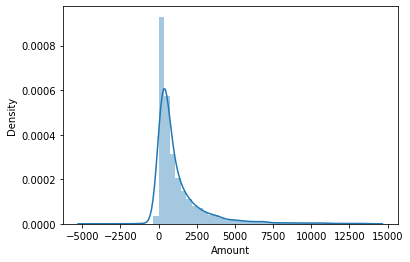

In [34]:
sns.distplot(rfm_df["Amount"])

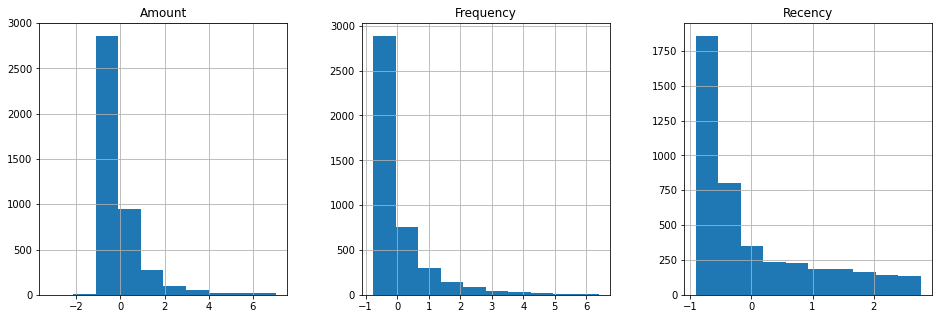

In [35]:
# Convert array of values to dataframe
scaled_features_df = pd.DataFrame(rfm_df_scaled, index=rfm_df.index, columns=rfm_df.columns)

#Plot scaled values
fig, axes = plt.subplots(ncols = 3, figsize=(16,5))

scaled_features_df.hist(ax=[axes[0], axes[1], axes[2]])
plt.show();

## C. Modelling

One your data is ready - meaning there are no more missing values, there are no strings, and the features have been engineered and selected based on your need, then we can begin modelling. We can import the K-Means algorithm from Scikit-Learn to start clustering.

**K-means clustering** is an unsupervised machine learning model where data points are grouped into "clusters" based on their proximity to each other. A number K of clusters is pre-determined, and these clusters are generated by setting a cluster mean that minimizes the distance from the center to the points in the same cluster.


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)
cluster_labels = kmeans.predict(rfm_df_scaled)

We can determine the number of clusters using the elbow-curve method. For the elbow method, we pick the k-value that has the sharpest corner.

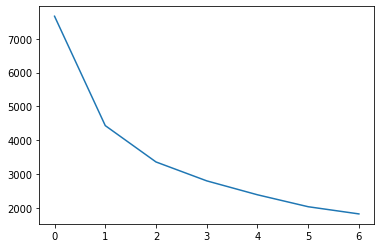

In [37]:
# Elbow-curve

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Another way to determine clusters is using the silhoutte method. Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [38]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.predict(rfm_df_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5411146183621807
For n_clusters=3, the silhouette score is 0.5084912287707195
For n_clusters=4, the silhouette score is 0.4797912632344603
For n_clusters=5, the silhouette score is 0.46626861640788636
For n_clusters=6, the silhouette score is 0.41699184668248857
For n_clusters=7, the silhouette score is 0.41729138764134466
For n_clusters=8, the silhouette score is 0.3947826380914848


In [39]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)
cluster_labels = kmeans.predict(rfm_df_scaled)

In [40]:
rfm['Cluster_Id'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346,0.00,2,325,2
1,12347,4310.00,182,1,1
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,2


## D. Evaluation

Let's try to visualize our results.

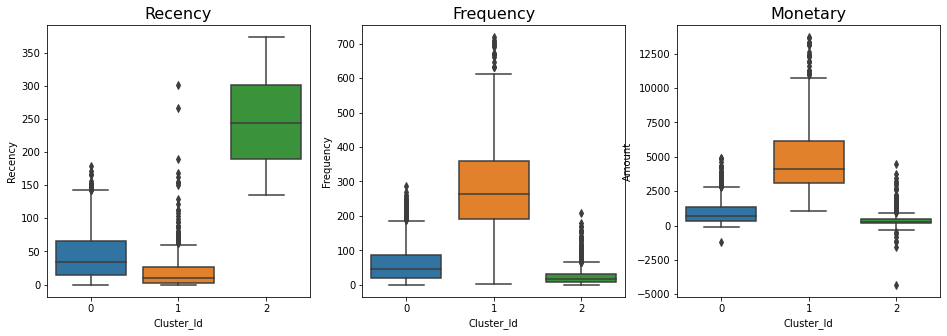

In [41]:
fig, axes = plt.subplots(ncols = 3, figsize=(16,5))
sns.boxplot(x=rfm.Cluster_Id, y=rfm.Recency, ax=axes[0])
axes[0].set_title("Recency", fontsize=16)

sns.boxplot(x=rfm.Cluster_Id, y=rfm.Frequency, ax=axes[1])
axes[1].set_title("Frequency", fontsize=16)

sns.boxplot(x=rfm.Cluster_Id, y=rfm.Amount, ax=axes[2])
axes[2].set_title("Monetary", fontsize=16)

plt.show();

## Test What You've Learned

1. What is the median recency of cluster 1?

In [50]:
# Insert code here
rfm[rfm['Cluster_Id']==1].median()

CustomerID    15058.00
Amount         4122.28
Frequency       265.00
Recency          10.00
Cluster_Id        1.00
dtype: float64

2. Which cluster has the largest range of values? What is the range?

In [78]:
rfm.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency', 'Cluster_Id'], dtype='object')

In [73]:
# Insert code here
rfm.groupby('Cluster_Id')['Frequency'].max()-rfm.groupby('Cluster_Id')['Frequency'].min()


Cluster_Id
0    286
1    714
2    209
Name: Frequency, dtype: int64

In [75]:
rfm.groupby('Cluster_Id')['Recency'].max()-rfm.groupby('Cluster_Id')['Recency'].min()

Cluster_Id
0    179
1    301
2    238
Name: Recency, dtype: int64

In [80]:
rfm.groupby('Cluster_Id')['Amount'].max()-rfm.groupby('Cluster_Id')['Amount'].min()

Cluster_Id
0     6077.71
1    12638.01
2     8751.73
Name: Amount, dtype: float64

3. Which cluster has the most number of customers? How many customers does this cluster have?

In [101]:
rfm_1 = rfm[rfm['Cluster_Id']==0]
rfm_1['CustomerID'].value_counts().sum()

2726

In [81]:
# Insert code here
rfm['Cluster_Id'].value_counts()

0    2726
2    1068
1     499
Name: Cluster_Id, dtype: int64

4. When performing clusters, what is the kmeans algorithm trying to minimize?
    - a. silhouette score
    - b. inertia
    - c. variance
    - d. error



5. In RFM, this refers to how often a customer makes a purchase:
    - a. Recency
    - b. Frequency
    - c. Monetary Value